In [1]:
import pandas as pd
import numpy as np
import keras
import time
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
from keras.utils import np_utils
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [2]:
# Hyper parameters
batch_size = 128
nb_epoch = 40

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28
num_classes = 7

# Parameters for LSTM network
nb_lstm = 64
nb_time_steps = img_rows
dim_input_vector = img_cols

In [4]:
# import the data of images and the data from HAM_metadata.csv
dataset_images = pd.read_csv("hmnist_28_28_RGB.csv")

In [5]:
# removing the 'label' column from the data frame so I only keep the image data
images = dataset_images.drop(['label'], axis=1)
# keeping only the label column
labels = dataset_images['label']

In [6]:
# Oversampling to overcome class imbalance
oversample = RandomOverSampler()
images, labels = oversample.fit_resample(images, labels)

In [7]:
# Parsing the images into an array and resizing them from 4d arrays to 3d arrays
images = np.array(images)
images = images.reshape(-1, 28, 84)

In [8]:
# Normalizing the images.
images = (images - np.mean(images)) / np.std(images)

In [9]:
# Splitting my predictive and response data into training and testing sets with an 80:20 ratio
# while the state is set to a constant so that the splitting can be done reproducibly
x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=1, test_size=0.20)

In [10]:
# Chacking the structure of my test and train sets
print('X_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train shape: (37548, 28, 84)
37548 train samples
9387 test samples


In [11]:
# encoding my labels to one-hot vectors
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [12]:
start = time.time()

In [13]:
# Building LSTM network
model = Sequential()
model.add(LSTM(nb_lstm, input_shape=(nb_time_steps, 84), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(nb_lstm, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 64)            38144     
                                                                 
 dropout (Dropout)           (None, 28, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 7)                 455       
                                                                 
Total params: 71,623
Trainable params: 71,623
Non-trainable params: 0
_________________________________________________________________


In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_Model-RGB.h5', monitor='val_acc', mode='max', verbose=1)

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fitting the model
history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, callbacks=[callback], validation_split = 0.2)

Epoch 1/40
235/235 [==============================] - ETA: 0s - loss: 1.3769 - accuracy: 0.4661
Epoch 1: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 14s 48ms/step - loss: 1.3769 - accuracy: 0.4661 - val_loss: 0.9998 - val_accuracy: 0.6186
Epoch 2/40
234/235 [============================>.] - ETA: 0s - loss: 0.9629 - accuracy: 0.6455
Epoch 2: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 9s 39ms/step - loss: 0.9633 - accuracy: 0.6454 - val_loss: 0.7600 - val_accuracy: 0.7060
Epoch 3/40
234/235 [============================>.] - ETA: 0s - loss: 0.7736 - accuracy: 0.7161
Epoch 3: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 9s 39ms/step - loss: 0.7732 - accuracy: 0.7162 - val_loss: 0.6228 - val_accuracy: 0.7662
Epoch 4/40
235/235 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.7566
Epoch 4: saving model to trained-models\LSTM_

235/235 [==============================] - 10s 44ms/step - loss: 0.1656 - accuracy: 0.9429 - val_loss: 0.2099 - val_accuracy: 0.9294
Epoch 30/40
235/235 [==============================] - ETA: 0s - loss: 0.1799 - accuracy: 0.9399
Epoch 30: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 9s 37ms/step - loss: 0.1799 - accuracy: 0.9399 - val_loss: 0.2482 - val_accuracy: 0.9268
Epoch 31/40
234/235 [============================>.] - ETA: 0s - loss: 0.1819 - accuracy: 0.9398
Epoch 31: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 9s 38ms/step - loss: 0.1822 - accuracy: 0.9398 - val_loss: 0.1802 - val_accuracy: 0.9426
Epoch 32/40
235/235 [==============================] - ETA: 0s - loss: 0.1526 - accuracy: 0.9479
Epoch 32: saving model to trained-models\LSTM_Model-RGB.h5
235/235 [==============================] - 9s 38ms/step - loss: 0.1526 - accuracy: 0.9479 - val_loss: 0.1679 - val_accuracy: 0.9467
Epo

In [17]:
stop = time.time()

In [18]:
# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Summary: Loss over the test dataset: 0.20, Accuracy: 0.94


In [19]:
print("Time to build and train the model is : ",(stop - start)/60, " minutes")

Time to build and train the model is :  6.231402571996053  minutes


In [20]:
# Setting up the variables require to created a confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis =1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_classes )

294/294 [==============================] - 2s 5ms/step


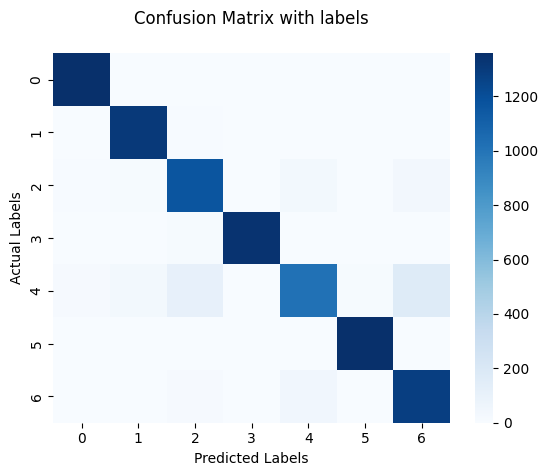

In [21]:
# plotting the confusion matrix for the model label prediction
ax = sns.heatmap(confusion_matrix, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
plt.show()

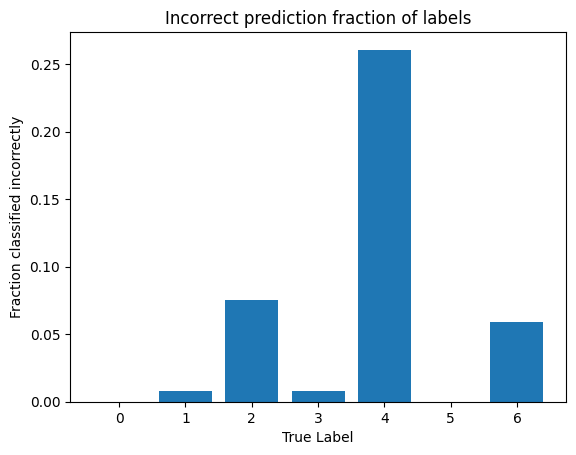

In [22]:
# plotting the incorrect prediction fraction of each class label
label_frac_error = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.title('Incorrect prediction fraction of labels')
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')
plt.show()